In [1]:
%load_ext autoreload
%autoreload 2

# %matplotlib notebook

import numpy as np

import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [9, 6]

import sys

sys.path.append("incl/")

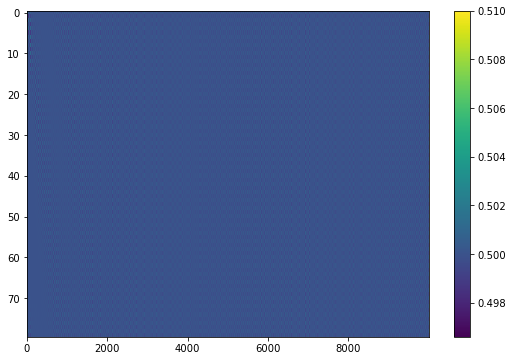

In [83]:
from scipy.integrate import solve_ivp as scpy_solve_ivp

N = 80  # Number of variables
F = 1.0  # Forcing

def L96(t,x):
    d = np.zeros(N)
    for i in range(N):
        d[i] = (x[(i + 1) % N] - x[i - 2]) * x[i - 1] - x[i] + F
    return d

x0 = F * np.ones(N)  # Initial state (equilibrium)
x0[0] += 0.01  # Add small perturbation to the first variable


t = np.linspace(0.0, 1000.0, 10000)
sol = scpy_solve_ivp(L96, [t[0],t[-1]], x0, t_eval=t)

plt.imshow(sol.y, aspect='auto', interpolation='none')
plt.colorbar()
plt.show()


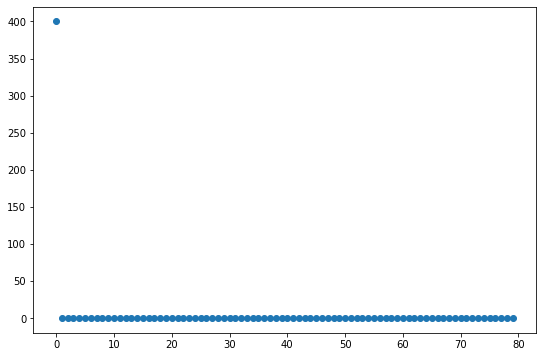

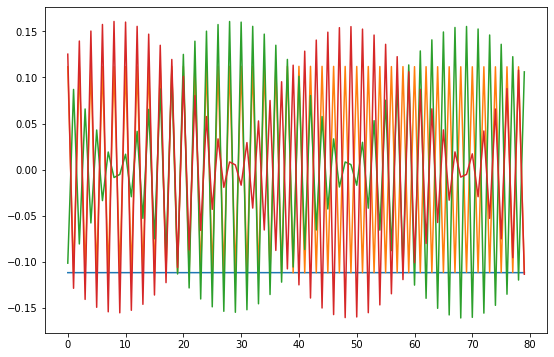

In [84]:
data_matrix = sol.y[:,2000:]


from ELPH_Dim_Reducer import SVD

SVDreducer = SVD()

SVDreducer.train(data_matrix)

plt.plot(SVDreducer.S,'o')
plt.show()

rdim = 4
for k in range(rdim):
    plt.plot(SVDreducer.U[:,k])
plt.show()

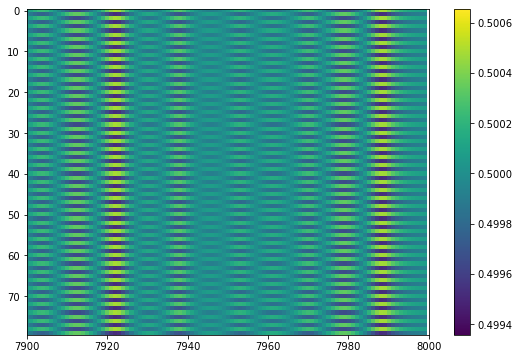

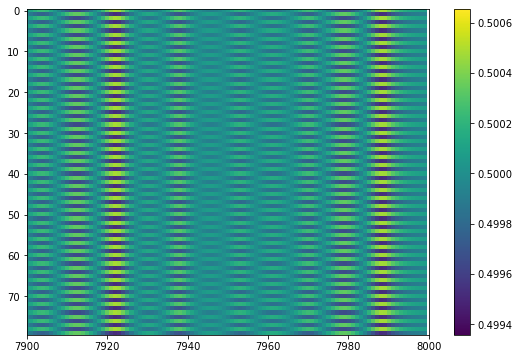

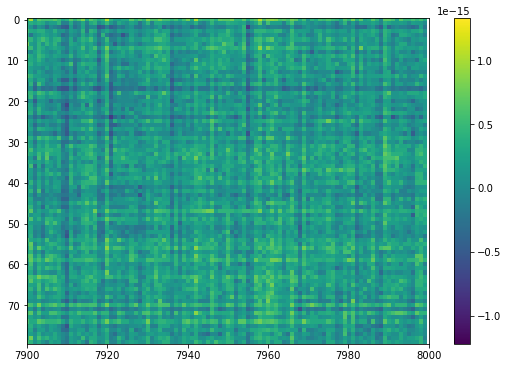

In [85]:
red_coef_matrix = SVDreducer.reduce(data_matrix,20)

recon = SVDreducer.expand(red_coef_matrix)

xmin = 7900
xmax = 8000

plt.imshow(data_matrix, aspect='auto', interpolation='none')
plt.colorbar()
plt.xlim(xmin,xmax)
plt.show()

plt.imshow(recon, aspect='auto', interpolation='none')
plt.colorbar()
plt.xlim(xmin,xmax)
plt.show()

plt.imshow(data_matrix - recon, aspect='auto', interpolation='none')
plt.colorbar()
plt.xlim(xmin,xmax)
plt.show()

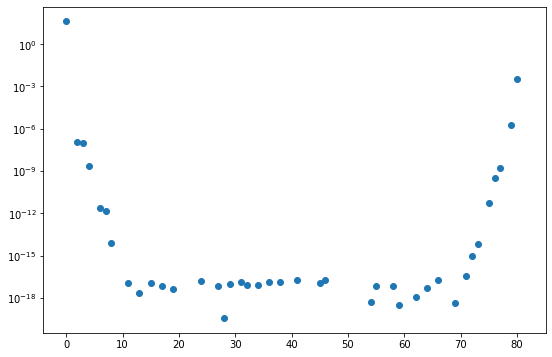

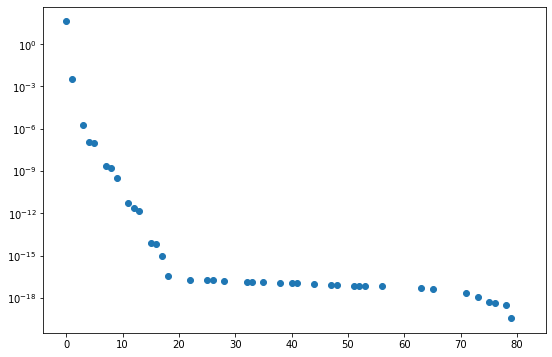

In [86]:
from ELPH_Dim_Reducer import FFT

FFTreducer = FFT(sorted=True)

FFTreducer.train(data_matrix)


plt.semilogy(FFTreducer.mean_coefs,'o')
plt.show()

plt.semilogy(FFTreducer.mean_coefs[FFTreducer.sort_inds],'o')
plt.show()

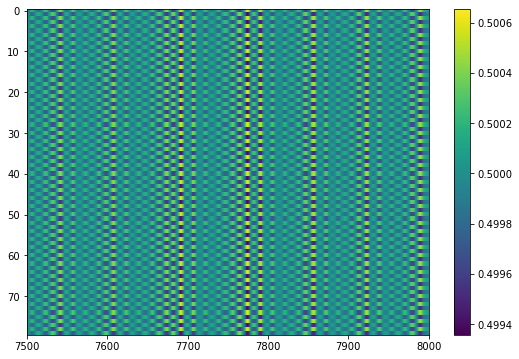

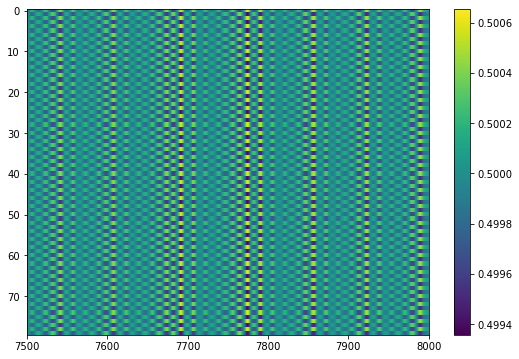

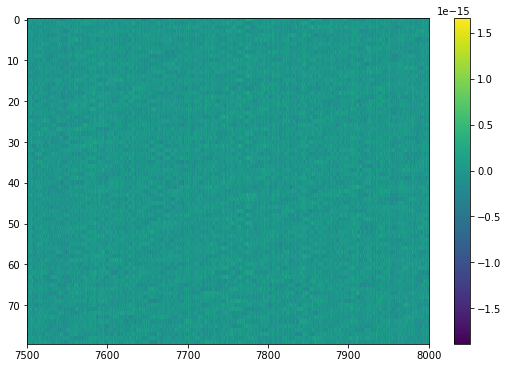

In [87]:
red_coef_matrix = FFTreducer.reduce(data_matrix,20)

recon = FFTreducer.expand(red_coef_matrix)

xmin = 7500
xmax = 8000

plt.imshow(data_matrix, aspect='auto', interpolation='none')
plt.colorbar()
plt.xlim(xmin,xmax)
plt.show()

plt.imshow(recon, aspect='auto', interpolation='none')
plt.colorbar()
plt.xlim(xmin,xmax)
plt.show()

plt.imshow(data_matrix - recon, aspect='auto', interpolation='none')
plt.colorbar()
plt.xlim(xmin,xmax)
plt.show()